# Predictive Model for jobs_df

Based on jobs_df dataset which is original dataset + date/time expansion.

Based on https://medium.com/datadriveninvestor/a-simple-guide-to-creating-predictive-models-in-python-part-2a-aa86ece98f86

## 1. Load Libraries

In [1]:
import pandas as pd #provides high-performance, easy-to-use data structures and data analysis tools
import numpy as np #fundamental package for scientific computing with Python
import seaborn as sns #Python data visualisation library based on matplotlib
import matplotlib.pyplot as plt #2D plotting library

from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## 2. Load Dataset

In [2]:
df = pd.read_csv('jobs_df.csv')
df.head(10)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (9,17,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,area_id,bookable_individually,break_duration,created_at,deleted_at,employer_id,end_time,filled_spots,health_and_safety_information,...,workers_required,Date,Day,Month,Year,Time,Hour,Minute,Day of Year,Week of Year
0,0,NaN,False,0,2015-10-22 14:07:14.213,NaN,39,2015-10-26 00:00:00.000,0,NaN,...,1,2015-10-25,Sunday,October,2015,17:00:00,17,0,298,42
1,1,NaN,False,0,2015-10-22 14:08:48.880,NaN,39,2015-10-26 00:00:00.000,0,NaN,...,1,2015-10-25,Sunday,October,2015,17:00:00,17,0,298,42
2,2,NaN,False,0,2015-10-22 14:10:16.920,NaN,39,2015-10-26 00:00:00.000,1,NaN,...,1,2015-10-25,Sunday,October,2015,17:00:00,17,0,298,42
3,3,NaN,False,0,2015-10-27 10:02:46.500,NaN,39,2015-11-01 00:00:00.000,1,NaN,...,1,2015-10-31,Saturday,October,2015,18:30:00,18,30,304,43
4,4,NaN,False,0,2015-10-27 10:05:35.850,NaN,39,2015-11-01 00:00:00.000,1,NaN,...,1,2015-10-31,Saturday,October,2015,18:30:00,18,30,304,43
5,5,NaN,False,0,2015-10-27 10:06:46.857,NaN,39,2015-11-01 00:00:00.000,1,NaN,...,1,2015-10-31,Saturday,October,2015,18:30:00,18,30,304,43
6,6,NaN,False,0,2015-10-27 10:08:42.330,NaN,39,2015-11-01 00:00:00.000,1,NaN,...,1,2015-10-31,Saturday,October,2015,18:30:00,18,30,304,43
7,7,NaN,False,0,2015-10-27 12:21:15.357,NaN,39,2015-11-01 00:00:00.000,1,NaN,...,1,2015-10-31,Saturday,October,2015,18:30:00,18,30,304,43
8,8,NaN,False,0,2015-10-28 13:49:21.307,NaN,39,2015-11-15 00:00:00.000,1,NaN,...,1,2015-11-14,Saturday,November,2015,18:00:00,18,0,318,45
9,9,NaN,False,0,2015-10-28 13:51:04.093,NaN,39,2015-11-15 00:00:00.000,1,NaN,...,1,2015-11-14,Saturday,November,2015,18:00:00,18,0,318,45


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133868 entries, 0 to 133867
Data columns (total 36 columns):
Unnamed: 0                       133868 non-null int64
area_id                          12573 non-null float64
bookable_individually            133868 non-null bool
break_duration                   133868 non-null int64
created_at                       133868 non-null object
deleted_at                       24142 non-null object
employer_id                      133868 non-null int64
end_time                         133868 non-null object
filled_spots                     133868 non-null int64
health_and_safety_information    514 non-null object
id                               133868 non-null int64
industry_id                      133868 non-null int64
listing_id                       133868 non-null int64
pay_rate                         131266 non-null float64
pay_rate_max                     133868 non-null float64
pay_rate_min                     133868 non-null float64
pla

In [4]:
df.describe()

,Unnamed: 0,area_id,break_duration,employer_id,filled_spots,id,industry_id,listing_id,pay_rate,pay_rate_max,...,role_id,stage,total_spots,v1_job_id,workers_required,Year,Hour,Minute,Day of Year,Week of Year
count,133868.000000,12573.000000,133868.00000,133868.000000,133868.000000,133868.000000,133868.000000,133868.000000,131266.000000,133868.000000,...,133868.000000,110042.000000,133868.000000,13878.000000,133868.000000,133868.000000,133868.000000,133868.000000,133868.000000,133868.000000
mean,67379.801349,21457.998012,264.86970,21001.684413,2.037388,74577.247879,1.047308,59681.072923,9.872256,29.565633,...,34.395472,2.935207,2.341172,8914.831244,2.162107,2017.904772,12.642342,7.420870,202.287955,29.090425
std,38891.034958,7546.275151,654.26993,10986.401087,4.300232,42914.908175,0.212614,35362.454065,1.630670,2.706683,...,19.370939,0.369477,12.138611,5035.581528,5.198047,0.777128,4.191211,13.299921,105.059241,15.191443
min,0.000000,3681.000000,-3600.00000,39.000000,0.000000,6.000000,1.000000,1.000000,0.000000,9.030000,...,28.000000,0.000000,0.000000,6.000000,1.000000,2015.000000,0.000000,0.000000,1.000000,0.000000
25%,33712.750000,20514.000000,0.00000,10327.000000,1.000000,38156.750000,1.000000,29306.000000,9.000000,30.000000,...,29.000000,3.000000,1.000000,4610.250000,1.000000,2017.000000,9.000000,0.000000,116.000000,17.000000
50%,67392.500000,23212.000000,0.00000,28222.000000,1.000000,72909.500000,1.000000,58676.500000,9.000000,30.000000,...,30.000000,3.000000,1.000000,9019.500000,1.000000,2018.000000,13.000000,0.000000,198.000000,29.000000
75%,101085.250000,26550.000000,0.00000,29708.000000,2.000000,110641.250000,1.000000,88636.250000,10.000000,30.000000,...,32.000000,3.000000,2.000000,13152.750000,2.000000,2018.000000,16.000000,0.000000,301.000000,43.000000
max,134641.000000,31137.000000,7200.00000,32443.000000,684.000000,153497.000000,4.000000,125435.000000,30.000000,30.000000,...,157.000000,3.000000,3600.000000,17589.000000,1000.000000,2026.000000,23.000000,59.000000,366.000000,53.000000


In [5]:
print('total_spots: ', df['total_spots'].sum())
print('workers_required: ', df['workers_required'].sum())

total_spots:  313408
workers_required:  289437


## 3. Analysis of Columns 

### 3.1 bookable_individually

In [6]:
#seeing the split of bookable_individually column against total_spots and workers_required.

print(df.groupby('bookable_individually')['total_spots'].sum())
print(df.groupby('bookable_individually')['workers_required'].sum())

bookable_individually
False     82051
True     231357
Name: total_spots, dtype: int64
bookable_individually
False     50001
True     239436
Name: workers_required, dtype: int64


Note: Keep the bookable_individually column

### 3.2 break_duration

In [7]:
#checking the minimum entry(/entries) for the break_duration column.

df[df['break_duration'] == df['break_duration'].min()]

,Unnamed: 0,area_id,bookable_individually,break_duration,created_at,deleted_at,employer_id,end_time,filled_spots,health_and_safety_information,...,workers_required,Date,Day,Month,Year,Time,Hour,Minute,Day of Year,Week of Year
105281,105991,NaN,True,-3600,2018-12-27 22:49:46.203,NaN,31342,2018-12-30 21:30:00.000,3,NaN,...,1,2018-12-28,Friday,December,2018,16:30:00,16,30,362,52


In [8]:
# checking the maximum entry(/entries) for the break_duration column.

df[df['break_duration'] == df['break_duration'].max()]

,Unnamed: 0,area_id,bookable_individually,break_duration,created_at,deleted_at,employer_id,end_time,filled_spots,health_and_safety_information,...,workers_required,Date,Day,Month,Year,Time,Hour,Minute,Day of Year,Week of Year
104813,105519,NaN,True,7200,2018-12-22 13:23:54.807,NaN,30610,2018-12-27 21:00:46.397,1,NaN,...,1,2018-12-27,Thursday,December,2018,10:00:46.397000,10,0,361,52
105110,105819,NaN,True,7200,2018-12-26 18:05:48.267,NaN,29872,2018-12-27 22:30:45.223,1,NaN,...,1,2018-12-27,Thursday,December,2018,11:30:45.223000,11,30,361,52
106384,107106,NaN,True,7200,2019-01-04 22:04:08.407,NaN,29872,2019-01-05 22:30:54.597,1,NaN,...,1,2019-01-05,Saturday,January,2019,12:30:54.597000,12,30,5,0
106498,107220,NaN,True,7200,2019-01-06 00:15:21.860,NaN,29872,2019-01-06 22:30:21.260,1,NaN,...,1,2019-01-06,Sunday,January,2019,12:30:21.260000,12,30,6,0
106832,107554,NaN,True,7200,2019-01-09 11:20:28.957,NaN,30610,2019-01-15 21:00:56.567,2,NaN,...,1,2019-01-14,Monday,January,2019,10:00:56.567000,10,0,14,2
106834,107556,NaN,False,7200,2019-01-09 11:25:34.747,2019-01-09 11:32:35.923,29755,2019-01-18 16:00:00.000,0,NaN,...,1,2019-01-14,Monday,January,2019,08:00:00,8,0,14,2
107061,107784,NaN,True,7200,2019-01-10 17:00:58.817,NaN,31686,2019-01-12 22:00:00.000,1,NaN,...,1,2019-01-12,Saturday,January,2019,09:00:00,9,0,12,1
107164,107887,NaN,False,7200,2019-01-11 12:47:04.780,NaN,18410,2019-01-13 11:30:00.000,2,NaN,...,1,2019-01-12,Saturday,January,2019,11:30:00,11,30,12,1
107424,108147,NaN,True,7200,2019-01-14 01:07:18.273,NaN,29872,2019-01-14 22:30:19.217,1,NaN,...,1,2019-01-14,Monday,January,2019,12:30:19.217000,12,30,14,2
107437,108160,NaN,True,7200,2019-01-14 09:13:34.560,NaN,979,2019-01-14 23:00:03.063,1,NaN,...,1,2019-01-14,Monday,January,2019,11:00:03.063000,11,0,14,2


Note: drop the minimum row.

### 3.3 created_at, deleted_at, filled_spots

In [9]:
# checking if all entries that were DELETED were after the creation date and before the event date
df_entry_dates = df[['created_at', 'deleted_at', 'start_time','total_spots','workers_required','filled_spots']].copy()
df_entry_dates.created_at = pd.to_datetime(df_entry_dates['created_at'])
df_entry_dates.deleted_at = pd.to_datetime(df_entry_dates['deleted_at'])
df_entry_dates.start_time = pd.to_datetime(df_entry_dates['start_time'])

# Dropping rows with empyty start_time
df_entry_dates = df_entry_dates.dropna(subset = ['deleted_at'])

# Extract the day of year for each row
df_entry_dates['created_day'] = df_entry_dates['created_at'].dt.strftime("%j")
df_entry_dates['deleted_day'] = df_entry_dates['deleted_at'].dt.strftime("%j")
df_entry_dates['start_day'] = df_entry_dates['start_time'].dt.strftime("%j")

# Changing column types
df_entry_dates['created_day'] = df_entry_dates['created_day'].astype('int64',copy=False)
df_entry_dates['deleted_day'] = df_entry_dates['deleted_day'].astype('int64',copy=False)
df_entry_dates['start_day'] = df_entry_dates['start_day'].astype('int64',copy=False)

# Subtraction of days
df_entry_dates['deleted_created'] = df_entry_dates['deleted_day']-df_entry_dates['created_day']
df_entry_dates['start_deleted'] = df_entry_dates['start_day']-df_entry_dates['deleted_day']

In [10]:
df_entry_dates

,created_at,deleted_at,start_time,total_spots,workers_required,filled_spots,created_day,deleted_day,start_day,deleted_created,start_deleted
11053,2017-05-17 18:09:40.277,2017-07-07 13:35:26.653,2017-06-23 07:30:00.000,0,1,0,137,188,174,51,-14
11056,2017-05-17 18:13:44.870,2017-07-07 13:35:15.420,2017-07-03 06:30:00.000,0,1,0,137,188,184,51,-4
11057,2017-05-17 18:15:23.167,2017-07-07 13:35:30.133,2017-07-04 07:30:00.000,0,1,0,137,188,185,51,-3
11058,2017-05-17 18:17:14.943,2017-07-07 13:35:26.617,2017-07-05 07:30:00.000,0,1,0,137,188,186,51,-2
11059,2017-05-17 18:18:16.527,2017-07-07 13:35:24.640,2017-07-06 07:30:00.000,0,1,0,137,188,187,51,-1
11060,2017-05-17 18:18:59.530,2017-07-07 13:35:26.783,2017-07-07 07:30:00.000,0,1,0,137,188,188,51,0
11096,2017-05-18 08:56:02.470,2017-07-07 13:35:16.907,2017-07-15 13:00:00.000,0,2,0,138,188,196,50,8
11097,2017-05-18 08:56:04.597,2017-07-07 13:35:24.160,2017-07-15 13:00:00.000,0,5,0,138,188,196,50,8
11098,2017-05-18 08:56:07.250,2017-07-07 13:35:29.880,2017-07-15 13:00:00.000,0,25,0,138,188,196,50,8
11399,2017-05-22 11:07:05.843,2017-07-07 13:35:12.467,2017-06-23 21:00:00.000,0,1,0,142,188,174,46,-14


In [11]:
df_entry_dates.describe()

,total_spots,workers_required,filled_spots,created_day,deleted_day,start_day,deleted_created,start_deleted
count,24142.0,24142.000000,24142.0,24142.000000,24142.000000,24142.000000,24142.000000,24142.000000
mean,0.0,2.193190,0.0,210.932483,216.811366,219.842929,5.878883,3.031563
std,0.0,8.826997,0.0,101.343947,105.902883,106.315784,24.060991,27.992411
min,0.0,1.000000,0.0,1.000000,1.000000,1.000000,-364.000000,-364.000000
25%,0.0,1.000000,0.0,124.000000,127.000000,130.000000,0.000000,0.000000
50%,0.0,1.000000,0.0,240.000000,242.000000,243.000000,0.000000,2.000000
75%,0.0,2.000000,0.0,294.000000,321.000000,325.000000,4.000000,5.000000
max,0.0,1000.000000,0.0,365.000000,365.000000,365.000000,280.000000,363.000000


In [12]:
df_entry_dates.isnull().any()

created_at          False
deleted_at          False
start_time          False
total_spots         False
workers_required    False
filled_spots        False
created_day         False
deleted_day         False
start_day           False
deleted_created     False
start_deleted       False
dtype: bool

In [13]:
#checking the entries for the start_deleted column.

df_entry_dates.sort_values(by='start_deleted', ascending=True)

,created_at,deleted_at,start_time,total_spots,workers_required,filled_spots,created_day,deleted_day,start_day,deleted_created,start_deleted
105850,2018-12-31 14:21:57.017,2018-12-31 16:10:08.217,2019-01-01 12:00:00.000,0,3,0,365,365,1,0,-364
105913,2018-12-31 19:27:18.470,2018-12-31 19:55:34.780,2019-01-01 04:00:00.000,0,1,0,365,365,1,0,-364
105883,2018-12-31 17:06:30.423,2018-12-31 17:08:13.347,2019-01-01 10:00:00.603,0,1,0,365,365,1,0,-364
105873,2018-12-31 16:14:55.197,2018-12-31 16:16:16.290,2019-01-01 12:00:00.000,0,3,0,365,365,1,0,-364
105845,2018-12-31 14:03:48.810,2018-12-31 14:06:48.780,2019-01-01 10:00:00.000,0,3,0,365,365,1,0,-364
105824,2018-12-31 12:50:32.913,2018-12-31 13:08:08.717,2019-01-01 09:00:00.000,0,1,0,365,365,1,0,-364
105813,2018-12-31 11:52:54.680,2018-12-31 13:04:57.383,2019-01-01 09:30:00.000,0,1,0,365,365,1,0,-364
103710,2018-12-17 15:03:03.250,2018-12-30 18:38:07.197,2019-01-01 11:00:00.000,0,1,0,351,364,1,13,-363
105855,2018-12-31 14:50:46.487,2018-12-31 16:21:26.153,2019-01-02 08:00:00.000,0,1,0,365,365,2,0,-363
105854,2018-12-31 14:47:16.957,2018-12-31 16:21:11.313,2019-01-02 08:00:00.000,0,1,0,365,365,2,0,-363


In [14]:
#checking the entries for the deleted_created column.

df_entry_dates.sort_values(by='deleted_created', ascending=True)

,created_at,deleted_at,start_time,total_spots,workers_required,filled_spots,created_day,deleted_day,start_day,deleted_created,start_deleted
105822,2018-12-31 12:46:54.213,2019-01-01 15:38:34.900,2019-01-01 16:30:00.000,0,1,0,365,1,1,-364,0
35674,2017-12-31 09:39:32.947,2018-01-01 01:30:44.007,2018-01-01 17:30:00.000,0,1,0,365,1,1,-364,0
105672,2018-12-30 13:21:54.420,2019-01-01 07:55:41.457,2019-01-02 10:00:00.000,0,3,0,364,1,2,-363,1
105868,2018-12-31 15:16:02.353,2019-01-02 17:44:05.827,2019-01-06 12:00:15.187,0,1,0,365,2,6,-363,4
35673,2017-12-31 09:17:24.467,2018-01-03 10:38:39.630,2018-01-05 17:00:00.000,0,1,0,365,3,5,-362,2
105522,2018-12-29 14:30:12.560,2019-01-02 15:42:05.527,2018-12-31 10:00:53.533,0,1,0,363,2,365,-361,363
105907,2018-12-31 18:56:29.270,2019-01-04 16:14:26.537,2019-01-09 16:00:00.000,0,35,0,365,4,9,-361,5
105310,2018-12-28 10:25:18.797,2019-01-01 09:25:59.560,2019-01-01 11:00:00.000,0,5,0,362,1,1,-361,0
105285,2018-12-27 23:10:28.487,2019-01-01 08:21:27.193,2019-01-02 07:00:00.000,0,1,0,361,1,2,-360,1
105206,2018-12-27 15:51:41.853,2019-01-02 12:31:50.593,2018-12-27 18:00:00.000,0,1,0,361,2,361,-359,359


Note for start_deleted column:
1. the rows with a negative start_deleted were because the entries were deleted a year before the start_time of the event. (ordinary)
2. the rows with the largest (359 to 363) start_deleted were entries that were deleted after the event start_time. (inordinary)
3. all entries that were deleted also have 0 filled spots.

Note for deleted_created column:
1. the rows with a negatvie entry were because the entries were deleted after the creation date. (ordinary)
2. the rows with a positive entry were also entries that were deleted after the creation date. (ordinary)

In conclusion:
1. Delete entries with "deleted_at" entries.
2. Can't delete all entries based on rows with 0 for filled_spots because there might be some rows that are still not flled yet and before the start_time.

### 3.4 employer_id

In [15]:
df_employer = df[['employer_id','total_spots','workers_required','filled_spots']].copy()
df_employer['employer_id'] = df_employer['employer_id'].astype('category',copy=False)
df_employer.groupby(['employer_id']).sum()

,total_spots,workers_required,filled_spots
employer_id,,,
39,525,557,480
45,0,10,0
95,5,6,1
97,8,8,7
100,47,37,38
104,25,25,22
147,62,55,56
157,128,91,123
160,398,399,343


Note: there are too many types of employees, so drop employer_id column.

### 3.5 industry_id

In [16]:
df_industry = df[['industry_id','total_spots','workers_required','filled_spots']].copy()
df_industry['industry_id'] = df_industry['industry_id'].astype('category',copy=False)
df_industry.groupby(['industry_id']).sum()

,total_spots,workers_required,filled_spots
industry_id,,,
1,293055,278498,258619
2,20336,10935,14122
4,17,4,0


In [17]:
df_industry

,industry_id,total_spots,workers_required,filled_spots
0,1,1,1,0
1,1,1,1,0
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
5,1,1,1,1
6,1,1,1,1
7,1,1,1,1
8,1,1,1,1
9,1,1,1,1


Note: keep industry_id and convert it to categorical.

### 3.6 platform_id

In [18]:
df_platform = df[['platform_id','total_spots','workers_required','filled_spots']].copy()
df_platform['platform_id'] = df_platform['platform_id'].astype('category',copy=False)
df_platform.groupby(['platform_id']).sum()

,total_spots,workers_required,filled_spots
platform_id,,,
1,301989,283921,268085
3,26,56,3
4,3,8,0
7,5738,1388,597
8,2516,907,1875
9,21,23,4
14,8,42,5
16,19,26,3
17,122,70,12


Note: treat it similar to role_id

### 3.7 rated

In [19]:
#seeing the split of rated column against total_spots and workers_required.

print(df.groupby('rated')['total_spots'].sum())
print(df.groupby('rated')['workers_required'].sum())

rated
False    194928
True     118480
Name: total_spots, dtype: int64
rated
False    192202
True      97235
Name: workers_required, dtype: int64


Note: keep the rated column

### 3.8 stage

In [20]:
df_stage = df[['stage','total_spots','workers_required','filled_spots']].copy()
df_stage['stage'] = df_stage['stage'].astype('category',copy=False)
df_stage.groupby(['stage']).sum()

,total_spots,workers_required,filled_spots
stage,,,
0.0,9183,7404,6890
1.0,3289,367,1296
2.0,14052,7144,8491
3.0,286884,223338,256064


Note: keep the stage column

### 3.9 timesheet_approval_needed

In [21]:
#seeing the split of rated column against total_spots and workers_required.

print(df.groupby('timesheet_approval_needed')['total_spots'].sum())
print(df.groupby('timesheet_approval_needed')['workers_required'].sum())

timesheet_approval_needed
False    300235
True      13173
Name: total_spots, dtype: int64
timesheet_approval_needed
False    283611
True       5826
Name: workers_required, dtype: int64


Note: keep the timesheet_approval_needed column

## 4. Making Changes to Dataframe df

In [22]:
#dropping unwanted columns
df = df.drop(['Unnamed: 0',
              'break_duration',
              'employer_id',
              'end_time',
              'health_and_safety_information',
              'id',
              'listing_id',
              'pay_rate',
              'pay_rate_max',
              'pay_rate_min',
              'purchase_order_number',
              'v1_job_id',
              'v1_shift_group_ids'], axis=1)

In [23]:
#dropping minimum row for break_duration, which has an index of 105281
df = df.drop(df.index[105281])

In [24]:
# Keeping only the rows that are empty for deleted_at and dropping deleted_at
df = df[df['deleted_at'].isnull()]
df = df.drop(['deleted_at'], axis=1)
df.head()

,area_id,bookable_individually,created_at,filled_spots,industry_id,platform_id,rated,role_id,stage,start_time,...,workers_required,Date,Day,Month,Year,Time,Hour,Minute,Day of Year,Week of Year
0,NaN,False,2015-10-22 14:07:14.213,0,1,1,True,30,3.0,2015-10-25 17:00:00.000,...,1,2015-10-25,Sunday,October,2015,17:00:00,17,0,298,42
1,NaN,False,2015-10-22 14:08:48.880,0,1,1,True,30,3.0,2015-10-25 17:00:00.000,...,1,2015-10-25,Sunday,October,2015,17:00:00,17,0,298,42
2,NaN,False,2015-10-22 14:10:16.920,1,1,1,True,30,3.0,2015-10-25 17:00:00.000,...,1,2015-10-25,Sunday,October,2015,17:00:00,17,0,298,42
3,NaN,False,2015-10-27 10:02:46.500,1,1,1,True,30,3.0,2015-10-31 18:30:00.000,...,1,2015-10-31,Saturday,October,2015,18:30:00,18,30,304,43
4,NaN,False,2015-10-27 10:05:35.850,1,1,1,True,30,3.0,2015-10-31 18:30:00.000,...,1,2015-10-31,Saturday,October,2015,18:30:00,18,30,304,43


In [25]:
# Creating Date and Time columns for created_at

## Changing start_time column to DateTime column
df.created_at = pd.to_datetime(df['created_at'])

## Extract the date and time for each row
df['Created_Day'] = df['created_at'].dt.strftime("%A")
df['Created_Month'] = df['created_at'].dt.strftime("%B")
df['Created_Year'] = df['created_at'].dt.strftime("%Y")
df['Created_Hour'] = df['created_at'].dt.strftime("%H")
df['Created_Day of Year'] = df['created_at'].dt.strftime("%j")
df['Created_Week of Year'] = df['created_at'].dt.strftime("%W")

In [26]:
# Renaming originial df date and time columns
df = df.rename(index=str, columns={"Day": "Event_Day",
                              "Month": "Event_Month",
                              "Year": "Event_Year",
                              "Hour": "Event_Hour",
                              "Day of Year":"Event_Day of Year",
                              "Week of Year": "Event_Week of Year"})

# Dropping unwanted date/time columns
df = df.drop(['created_at', 'start_time', 'Date', 'Time', 'Minute',], axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109725 entries, 0 to 133867
Data columns (total 23 columns):
area_id                      10412 non-null float64
bookable_individually        109725 non-null bool
filled_spots                 109725 non-null int64
industry_id                  109725 non-null int64
platform_id                  109725 non-null int64
rated                        109725 non-null bool
role_id                      109725 non-null int64
stage                        109725 non-null float64
timesheet_approval_needed    109725 non-null bool
total_spots                  109725 non-null int64
workers_required             109725 non-null int64
Event_Day                    109725 non-null object
Event_Month                  109725 non-null object
Event_Year                   109725 non-null int64
Event_Hour                   109725 non-null int64
Event_Day of Year            109725 non-null int64
Event_Week of Year           109725 non-null int64
Created_Day              

In [28]:
# filling area_id empty rows with 0
df['area_id'] = df['area_id'].replace(np.nan, 0)

In [29]:
# Changing column types to object
df['area_id'] = df['area_id'].astype('object',copy=False)
df['bookable_individually'] = df['bookable_individually'].astype('object',copy=False)
df['industry_id'] = df['industry_id'].astype('object',copy=False)
df['platform_id'] = df['platform_id'].astype('object',copy=False)
df['rated'] = df['rated'].astype('object',copy=False)
df['role_id'] = df['role_id'].astype('object',copy=False)
df['stage'] = df['stage'].astype('object',copy=False)
df['timesheet_approval_needed'] = df['timesheet_approval_needed'].astype('object',copy=False)

# Changing column types to int64
df['Created_Year'] = df['Created_Year'].astype('int64',copy=False)
df['Created_Hour'] = df['Created_Hour'].astype('int64',copy=False)
df['Created_Day of Year'] = df['Created_Day of Year'].astype('int64',copy=False)
df['Created_Week of Year'] = df['Created_Week of Year'].astype('int64',copy=False)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109725 entries, 0 to 133867
Data columns (total 23 columns):
area_id                      109725 non-null object
bookable_individually        109725 non-null object
filled_spots                 109725 non-null int64
industry_id                  109725 non-null object
platform_id                  109725 non-null object
rated                        109725 non-null object
role_id                      109725 non-null object
stage                        109725 non-null object
timesheet_approval_needed    109725 non-null object
total_spots                  109725 non-null int64
workers_required             109725 non-null int64
Event_Day                    109725 non-null object
Event_Month                  109725 non-null object
Event_Year                   109725 non-null int64
Event_Hour                   109725 non-null int64
Event_Day of Year            109725 non-null int64
Event_Week of Year           109725 non-null int64
Created_Day      

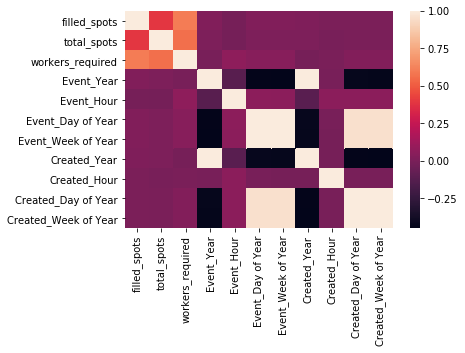

In [31]:
#checking correlation between variables.
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## 5. Feature Selection Process

Make target of model as workers_required. Based on https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [39]:
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [32]:
# Data transformation
# Convert categorical values to numeric using label encoder
from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

# Encoding the categorical variable
fit = df.select_dtypes(include=['object']).fillna('NA').apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    df[i] = d[i].transform(df[i].fillna('NA'))

In [33]:
X = df.drop("workers_required",1) #Feature Matrix
y = df["workers_required"] #Target Variable

### 5.1 Filter Method

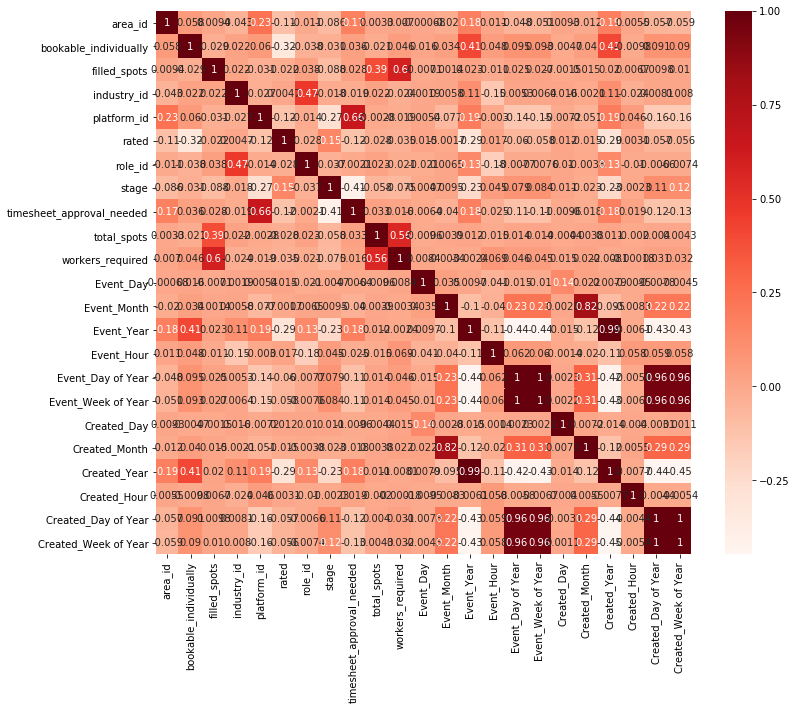

In [35]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [36]:
#Correlation with output variable
cor_target = abs(cor["workers_required"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

filled_spots        0.602590
total_spots         0.563423
workers_required    1.000000
Name: workers_required, dtype: float64

In [37]:
print(df[["filled_spots","total_spots"]].corr())

              filled_spots  total_spots
filled_spots      1.000000     0.392673
total_spots       0.392673     1.000000


### 5.2 Backward Elimination

In [41]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['bookable_individually', 'filled_spots', 'industry_id', 'platform_id', 'rated', 'role_id', 'stage', 'total_spots', 'Event_Day', 'Event_Month', 'Event_Year', 'Event_Hour', 'Event_Day of Year', 'Event_Week of Year', 'Created_Month', 'Created_Year', 'Created_Hour', 'Created_Day of Year', 'Created_Week of Year']


### 5.3 Recursive Feature Elimination

In [42]:
#no of features
nof_list=np.arange(1,22)            
high_score=0

#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 20
Score with 20 features: 0.198439


In [43]:
cols = list(X.columns)
model = LinearRegression()

#Initializing RFE model
rfe = RFE(model, 20)             

#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  

#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['bookable_individually', 'filled_spots', 'industry_id', 'platform_id',
       'rated', 'role_id', 'stage', 'timesheet_approval_needed', 'total_spots',
       'Event_Day', 'Event_Month', 'Event_Year', 'Event_Hour',
       'Event_Day of Year', 'Event_Week of Year', 'Created_Month',
       'Created_Year', 'Created_Hour', 'Created_Day of Year',
       'Created_Week of Year'],
      dtype='object')


### 5.4 Embedded Method

In [44]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Best alpha using built-in LassoCV: 0.060126
Best score using built-in LassoCV: 0.502178


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [45]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 14 variables and eliminated the other 8 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

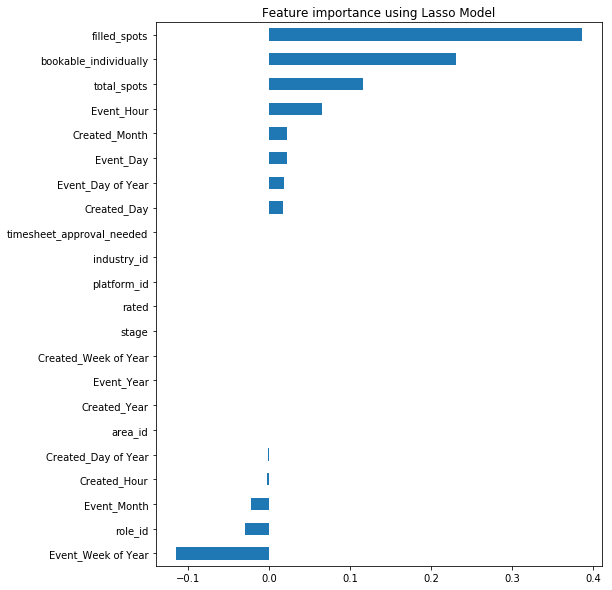

In [46]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [49]:
# if df has more than 2 votes:
df = df.drop(["area_id",
              "timesheet_approval_needed",
              "Created_Day"],1)
df.info()              

<class 'pandas.core.frame.DataFrame'>
Index: 109725 entries, 0 to 133867
Data columns (total 20 columns):
bookable_individually    109725 non-null int64
filled_spots             109725 non-null int64
industry_id              109725 non-null int64
platform_id              109725 non-null int64
rated                    109725 non-null int64
role_id                  109725 non-null int64
stage                    109725 non-null int64
total_spots              109725 non-null int64
workers_required         109725 non-null int64
Event_Day                109725 non-null int64
Event_Month              109725 non-null int64
Event_Year               109725 non-null int64
Event_Hour               109725 non-null int64
Event_Day of Year        109725 non-null int64
Event_Week of Year       109725 non-null int64
Created_Month            109725 non-null int64
Created_Year             109725 non-null int64
Created_Hour             109725 non-null int64
Created_Day of Year      109725 non-null int64
C

### 3. https://medium.com/@srnghn/machine-learning-trying-to-predict-a-numerical-value-8aafb9ad4d36

In [50]:
#Creating train and test datasets

from sklearn.model_selection import train_test_split

X = df.drop(columns=['workers_required'],axis=1)
y = df["workers_required"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [51]:
X_train.shape

(87780, 19)

In [52]:
X_test.shape

(21945, 19)

### 4. Machine Learning Models

In [53]:
#Standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


#### 4.1 Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
#Model Evaluation on Train Data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_train, model.predict(train_scaled))
mae = mean_absolute_error(y_train, model.predict(train_scaled))
r2 = r2_score(y_train, model.predict(train_scaled))

from math import sqrt

print("Train: mse = ",mse," & mae = ",mae," & rmse = ", sqrt(mse)," & r2 score = ", r2)

Train: mse =  7.433722826117517  & mae =  1.0787471440532181  & rmse =  2.726485434789175  & r2 score =  0.5487499045103348


The easier metric to understand is the mean absolute error, this means that on average our prediction was 1.6 away from the true prediction. Mean squared error, and consequently root mean squared error (RMSE), results in predictions further and further from the true value are punished more.

In [56]:
#test data
test_mse = mean_squared_error(y_test, model.predict(test_scaled))
test_mae = mean_absolute_error(y_test, model.predict(test_scaled))
test_r2 = r2_score(y_test, model.predict(test_scaled))
print("Test: mse = ",test_mse," & mae = ",test_mae," & rmse = ", sqrt(test_mse)," & r2 score = ", test_r2)

Test: mse =  7.192790340619801  & mae =  1.0730343416290509  & rmse =  2.6819377958147728  & r2 score =  0.4556746299844664


Results are slightly better on the test data.

#### 4.2 Decision Trees & Random Forests

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
tree_model.fit(train_scaled, y_train)
rf_model.fit(train_scaled, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [58]:
#Model Evaluation on Train Data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

tree_mse = mean_squared_error(y_train, tree_model.predict(train_scaled))
tree_mae = mean_absolute_error(y_train, tree_model.predict(train_scaled))
rf_mse = mean_squared_error(y_train, rf_model.predict(train_scaled))
rf_mae = mean_absolute_error(y_train, rf_model.predict(train_scaled))
tree_r2 = r2_score(y_train, tree_model.predict(train_scaled))
rf_r2 = r2_score(y_train, rf_model.predict(train_scaled))

from math import sqrt

print("Decision Tree training mse = ",tree_mse," & mae = ",tree_mae," & rmse = ", sqrt(tree_mse)," & r2 score = ", tree_r2)
print("Random Forest training mse = ",rf_mse," & mae = ",rf_mae," & rmse = ", sqrt(rf_mse)," & r2 score = ", rf_r2)

Decision Tree training mse =  0.010164995822890559  & mae =  0.0027899293688767373  & rmse =  0.10082160394920604  & r2 score =  0.9993829531389554
Random Forest training mse =  0.9104500660390795  & mae =  0.21025122872115354  & rmse =  0.9541750709587206  & r2 score =  0.9447328493611215


The easier metric to understand is the mean absolute error, this means that our predictions were perfect for the decision tree model but on average 1.0 away from the true prediction with the random forest model. Mean squared error, and consequently root mean squared error (RMSE), results in predictions further and further from the true value are punished more.

In [59]:
#test data
tree_test_mse = mean_squared_error(y_test, tree_model.predict(test_scaled))
tree_test_mae = mean_absolute_error(y_test, tree_model.predict(test_scaled))
rf_test_mse = mean_squared_error(y_test, rf_model.predict(test_scaled))
rf_test_mae = mean_absolute_error(y_test, rf_model.predict(test_scaled))
tree_test_r2 = r2_score(y_test, tree_model.predict(test_scaled))
rf_test_r2 = r2_score(y_test, rf_model.predict(test_scaled))
print("Decision Tree test mse = ",tree_test_mse," & mae = ",tree_test_mae," & rmse = ", sqrt(tree_test_mse)," & r2 score = ", tree_test_r2)
print("Random Forest test mse = ",rf_test_mse," & mae = ",rf_test_mae," & rmse = ", sqrt(rf_test_mse)," & r2 score = ", rf_test_r2)

Decision Tree test mse =  7.457292574871522  & mae =  0.5755616313511049  & rmse =  2.730804382388369  & r2 score =  0.4356580203363397
Random Forest test mse =  5.029937110618227  & mae =  0.5310186505224099  & rmse =  2.2427521286620657  & r2 score =  0.6193518441055792


Results are worse for test data.

#### 4.3 Neural Networks

In [60]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(train_scaled, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [61]:
#Model Evaluation on Train Data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, model.predict(train_scaled)))

from sklearn.metrics import r2_score
print(r2_score(y_train, model.predict(train_scaled)))

0.8655616313511051
0.7879706335310821


We have an accurary of 69.2% based on the training dataset.

In [62]:
print(accuracy_score(y_test, model.predict(test_scaled)))
print(r2_score(y_test, model.predict(test_scaled)))

0.8517657780815675
0.47364382669090555


We have an accuracy of 69.3% based on the test dataset which is worse than the training.

#### 4.4 K Nearest Neighbors

In [63]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(train_scaled, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [64]:
#Model Evaluation on Train Data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_train, model.predict(train_scaled))
mae = mean_absolute_error(y_train, model.predict(train_scaled))
r2 = r2_score(y_train, model.predict(train_scaled))

from math import sqrt

print("mse = ",mse," & mae = ",mae," & rmse = ", sqrt(mse)," & r2 score = ", r2)

mse =  4.445900660742765  & mae =  0.6062223741171109  & rmse =  2.1085304505135243  & r2 score =  0.7301200025041096


The easier metric to understand is the mean absolute error, this means that our predictions were perfect for the decision tree model but on average 1.3 away from the true prediction with the random forest model. Mean squared error, and consequently root mean squared error (RMSE), results in predictions further and further from the true value are punished more.

In [65]:
#test data
test_mse = mean_squared_error(y_test, model.predict(test_scaled))
test_mae = mean_absolute_error(y_test, model.predict(test_scaled))
test_r2 = r2_score(y_test, model.predict(test_scaled))
print("Test: mse = ",test_mse," & mae = ",test_mae," & rmse = ", sqrt(test_mse)," & r2 score = ", test_r2)

Test: mse =  6.229573934837092  & mae =  0.7709090909090909  & rmse =  2.4959114437089096  & r2 score =  0.5285674993236172


Results are worse for test data.

### 5. Final Model and Model Performance (STILL WORKING 8/7/2019)
The Random Forest model was chosen.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(train_scaled, y_train)

#Model Evaluation on Train Data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

rf_mse = mean_squared_error(y_train, rf_model.predict(train_scaled))
rf_mae = mean_absolute_error(y_train, rf_model.predict(train_scaled))
rf_r2 = r2_score(y_train, rf_model.predict(train_scaled))

from math import sqrt

print("Random Forest training mse = ",rf_mse," & mae = ",rf_mae," & rmse = ", sqrt(rf_mse)," & r2 score = ", rf_r2)

#test data
rf_test_mse = mean_squared_error(y_test, rf_model.predict(test_scaled))
rf_test_mae = mean_absolute_error(y_test, rf_model.predict(test_scaled))
rf_test_r2 = r2_score(y_test, rf_model.predict(test_scaled))
print("Random Forest test mse = ",rf_test_mse," & mae = ",rf_test_mae," & rmse = ", sqrt(rf_test_mse)," & r2 score = ", rf_test_r2)

The easier metric to understand is the mean absolute error, this means that our predictions were perfect for the decision tree model but on average 1.1 away from the true prediction with the random forest model. Mean squared error, and consequently root mean squared error (RMSE), results in predictions further and further from the true value are punished more.
Results are worse for test data.